<a href="https://colab.research.google.com/github/bahereh/Data_Science_Personal_Projects/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           currency
count    942.000000
mean   24917.016985
std     5105.798949
min    13280.000000
25%    23100.000000
50%    25950.000000
75%    28120.000000
max    33200.000000
     currency
930     31900
931     31900
932     32150
933     32000
934     31850
935     31900
936     31930
937     31900
938     31900
939     31740
940     31650
941     31450


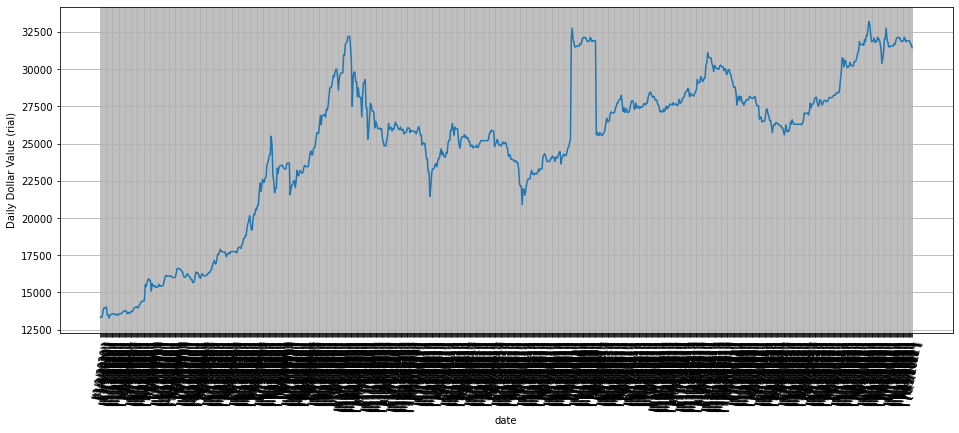

In [18]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('Daily_Currency.csv', usecols=[1], engine='python')
dataset2 = pandas.read_csv('Daily_Currency.csv', usecols=[0], engine='python')
date = dataset2.values.astype('str')
print(dataset.describe())
print(dataset.tail(12))

plt.figure(figsize=(22, 8))
plt.grid()
plt.plot(dataset)
plt.xlabel('date')
plt.ylabel('Daily Dollar Value (rial)')
plt.xticks([i for i in range(len(dataset))],list(date),rotation = 80)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [20]:
# fix random seed for reproducibility
tf.random.set_seed(7)
dataframe = pd.read_csv('Daily_Currency.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset) #.reshape(1,-1)


In [21]:
# split into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

753 189


In [22]:
# convert an array of values into a dataset matrix
import numpy as np
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [23]:
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1],1)) # make 2D into 3D -- we give 2 last D as input
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1)) # make 2D into 3D
# print(testX)




In [24]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(60,return_sequences=True,input_shape=(look_back,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(60))
# model.add(LSTM(5,input_shape=(1, look_back))) ## 4 hidden layer -- 
# model.add(LSTM(5))#, return_sequence = True
model.add(Dense(1)) # Final output
model.compile(loss='mean_squared_error', optimizer='adam')


model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 12, 60)            14880     
                                                                 
 lstm_4 (LSTM)               (None, 12, 60)            29040     
                                                                 
 lstm_5 (LSTM)               (None, 60)                29040     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 73,021
Trainable params: 73,021
Non-trainable params: 0
_________________________________________________________________


In [ ]:


model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
740/740 - 11s - loss: 0.0076 - 11s/epoch - 15ms/step
Epoch 2/100
740/740 - 7s - loss: 0.0051 - 7s/epoch - 10ms/step
Epoch 3/100
740/740 - 8s - loss: 0.0037 - 8s/epoch - 11ms/step
Epoch 4/100
740/740 - 9s - loss: 0.0024 - 9s/epoch - 12ms/step
Epoch 5/100
740/740 - 6s - loss: 0.0015 - 6s/epoch - 9ms/step
Epoch 6/100
740/740 - 10s - loss: 0.0016 - 10s/epoch - 14ms/step
Epoch 7/100
740/740 - 7s - loss: 0.0012 - 7s/epoch - 10ms/step
Epoch 8/100
740/740 - 11s - loss: 0.0011 - 11s/epoch - 14ms/step
Epoch 9/100
740/740 - 7s - loss: 0.0012 - 7s/epoch - 9ms/step
Epoch 10/100
740/740 - 7s - loss: 0.0011 - 7s/epoch - 9ms/step
Epoch 11/100
740/740 - 7s - loss: 0.0012 - 7s/epoch - 9ms/step
Epoch 12/100
740/740 - 7s - loss: 0.0010 - 7s/epoch - 9ms/step
Epoch 13/100


In [ ]:
trainY.shape

In [ ]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# print(testPredict)
# print(trainY[0])
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY[0,:]])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY[0,:]])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset)) # original
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
#Predict the future 30 days
print(len(test))
print(type(test))


In [ ]:
x_input=test[len(test)-look_back:].reshape(1,-1)
x_input.shape


In [ ]:
temp_input = list(x_input)
print(temp_input)
temp_input = temp_input[0].tolist() # take all the values
print(temp_input)
x_input.shape

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array
duration = 7
print(len(temp_input), temp_input, type(temp_input))
xxx = len(temp_input)
lst_output=[]
n_steps=look_back
i=0
while(i<duration): # FORECASTING #) DAYS
    
    if(xxx>look_back):
      #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
        xxx = len(list(temp_input))
    else:
      print('FIRST')
      x_input = x_input.reshape((1, n_steps,1))
      print(x_input)
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      xxx = len(list(temp_input))
      i=i+1
    

print(lst_output)

In [ ]:
print('THE PREDICTED DOLLAR VALUE IS: ', scaler.inverse_transform(lst_output))
print(len(lst_output))
tmp=test[len(test)-look_back:].reshape(1,-1)
tmp.shape
temp = list(tmp)
temp = temp[0].tolist() # take all the values
print(temp[-3:])
print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,101+duration)
#https://github.com/krishnaik06/Stock-MArket-Forecasting/blob/master/Untitled.ipynb


In [ ]:
len(dataset)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(day_new,scaler.inverse_transform(dataset[506:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))



# KPI ESTIMATION

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import LSTM
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

# # fix random seed for reproducibility
# tf.random.set_seed(7)
# dataframe = pd.read_csv('KPI.csv', usecols=[1], engine='python')
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# # normalize the dataset
# scaler = MinMaxScaler(feature_range=(0, 1)) #
# dataset = scaler.fit_transform(dataset) #.reshape(-1,1)
# # dataset is between 0,1

# # split into train and test sets
# train_size = int(len(dataset) * 0.67)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# print(len(train), len(test))


# # convert an array of values into a dataset matrix
# import numpy as np
# def create_dataset(dataset, look_back=1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), 0]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, 0])
# 	return np.array(dataX), np.array(dataY)


# # reshape into X=t and Y=t+1
# look_back = 1
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)


# # reshape input to be [samples, time steps, features]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


# # create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


# # make predictions
# trainPredict = model.predict(trainX)
# testPredict = model.predict(testX)
# # invert predictions
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# # calculate root mean squared error
# trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test Score: %.2f RMSE' % (testScore))


In [ ]:
# # shift train predictions for plotting
# trainPredictPlot = np.empty_like(dataset)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(dataset)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()
# # [USING THE TRAINED MODEL]